1. Create a connection to a SQLite database file named student_grades.db. If the cursor database file doesn't exist, SQLite will automatically create it.

In [24]:
import sqlite3

# Create SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Student grades database created!")

Student grades database created!


2. Create a cursor object to interact with the database.

In [25]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


You will need two tables for this assignment:

• students: A table to store student information.

• grades: A table to store student grades for different subjects.

In [26]:
# Create the students table
cursor.execute(
    '''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
    )
    ''')

print("Students table created!")

Students table created!


In [34]:
# Create the grades table
cursor.execute('DROP TABLE IF EXISTS grades')

cursor.execute(
    '''
    CREATE TABLE IF NOT EXISTS grades (
      grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
      student_id INTEGER NOT NULL,
      subject TEXT NOT NULL,
      grade INTEGER NOT NULL,
      FOREIGN KEY (student_id) REFERENCES students(student_id)
    )
    ''')
print("Grades table created!")

Grades table created!


Insert at least 5 students into the students table and at least 3 grades for each student into
the grades table.

In [35]:
# Data to insert into the students table
students_data = [
    ('Carlie', 'Stewart'),
    ('Taio', 'Cruz'),
    ('Cassidy', 'Stewart'),
    ('Hannah', 'Montana'),
    ('Saoirse', 'Ronan')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")


Data inserted into the students table!


In [160]:
# Data to insert into the grades table
grades_data = [
    (1, 'Math', 100),
    (1, 'Science', 105),
    (1, 'English', 97),
    (2, 'Math', 70),
    (2, 'Science', 68),
    (2, 'English', 97),
    (3, 'Math', 60),
    (3, 'Science', 80),
    (3, 'English', 89),
    (4, 'Math', 15),
    (4, 'Science', 55),
    (4, 'English', 98),
    (5, 'Math', 34),
    (5, 'Science', 65),
    (5, 'English', 105)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


Write SQL queries to answer the following questions:
1. Retrieve all students' names and their grades.
2. Find the average grade for each student.
3. Find the student with the highest average grade.
4. Find the average grade for the Math subject.
5. List all students who scored above 90 in any subject.

In [161]:
# 1. Retrieve all students' names and their grades

cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined students and grade details:")
for row in joined_data:
    print(row)

Joined students and grade details:
('Carlie', 'Stewart', 100)
('Carlie', 'Stewart', 105)
('Carlie', 'Stewart', 97)
('Taio', 'Cruz', 70)
('Taio', 'Cruz', 68)
('Taio', 'Cruz', 97)
('Cassidy', 'Stewart', 60)
('Cassidy', 'Stewart', 80)
('Cassidy', 'Stewart', 89)
('Hannah', 'Montana', 15)
('Hannah', 'Montana', 55)
('Hannah', 'Montana', 98)
('Saoirse', 'Ronan', 34)
('Saoirse', 'Ronan', 65)
('Saoirse', 'Ronan', 105)


In [162]:
# 2. Find the average grade for each student.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS AVG_GRADE
FROM students
JOIN grades on grades.student_id = students.student_id
GROUP BY students.student_id
''')


results = cursor.fetchall()

# Display the result
print("Average grade for each student:")
for row in results:
  print(row)


Average grade for each student:
('Carlie', 'Stewart', 100.66666666666667)
('Taio', 'Cruz', 78.33333333333333)
('Cassidy', 'Stewart', 76.33333333333333)
('Hannah', 'Montana', 56.0)
('Saoirse', 'Ronan', 68.0)


In [163]:
# 3. Find the student with the highest average grade.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS AVG_GRADE
FROM students
JOIN grades on grades.student_id = students.student_id
GROUP BY students.student_id
ORDER BY AVG_GRADE DESC
LIMIT 1
''')

# Fetch result
highest_grade_avg = cursor.fetchone()

# Display the result
print("Student with highest average grade:")
if highest_grade_avg:
    full_name = f"{highest_grade_avg[0]} {highest_grade_avg[1]}"
    print(full_name)

Student with highest average grade:
Carlie Stewart


In [164]:
# 4. Find the average grade for the Math subject.
cursor.execute('''
SELECT AVG(grade)
FROM grades
WHERE subject = 'Math'
'''
)

# Fetch result
result = cursor.fetchone()

# Print result
print("Average grade for Math: ")

for row in result:
  print(row)






Average grade for Math: 
55.8


In [165]:
# 5. List all students who scored above 90 in any subject.

cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON grades.student_id = students.student_id
WHERE grades.grade > 90
'''
)

# Fetch results
results = cursor.fetchall()

# Print results
print("Students who scored above 90 in any subject: ")
for row in results:
    full_name = f"{row[0]} {row[1]}"
    print(full_name)



Students who scored above 90 in any subject: 
Carlie Stewart
Taio Cruz
Hannah Montana
Saoirse Ronan


Use Pandas to load the data from the students and grades tables into DataFrames.

In [166]:
# Use Pandas to load the data from the students and grades tables into DataFrames.

import pandas as pd

# Query the students data into a DataFrame
students_df = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
students_df.head()

,student_id,first_name,last_name
0,1,Carlie,Stewart
1,2,Taio,Cruz
2,3,Cassidy,Stewart
3,4,Hannah,Montana
4,5,Saoirse,Ronan


In [167]:
# Load grades data into DataFrame
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

grades_df.head()

,grade_id,student_id,subject,grade
0,61,1,Math,100
1,62,1,Science,105
2,63,1,English,97
3,64,2,Math,70
4,65,2,Science,68


In [168]:
# Use JOIN queries to combine the data from both tables into a single DataFrame
# that includes each student's name, subject, and grade.


joined_df = students_df.merge(grades_df,on='student_id')


joined_df.head()
joined_df.tail()







,student_id,first_name,last_name,grade_id,subject,grade
10,4,Hannah,Montana,71,Science,55
11,4,Hannah,Montana,72,English,98
12,5,Saoirse,Ronan,73,Math,34
13,5,Saoirse,Ronan,74,Science,65
14,5,Saoirse,Ronan,75,English,105


Visualize the data with Matplotlib:

o Plot the average grades for each student.

o Create a bar chart showing the average grade for each subject.

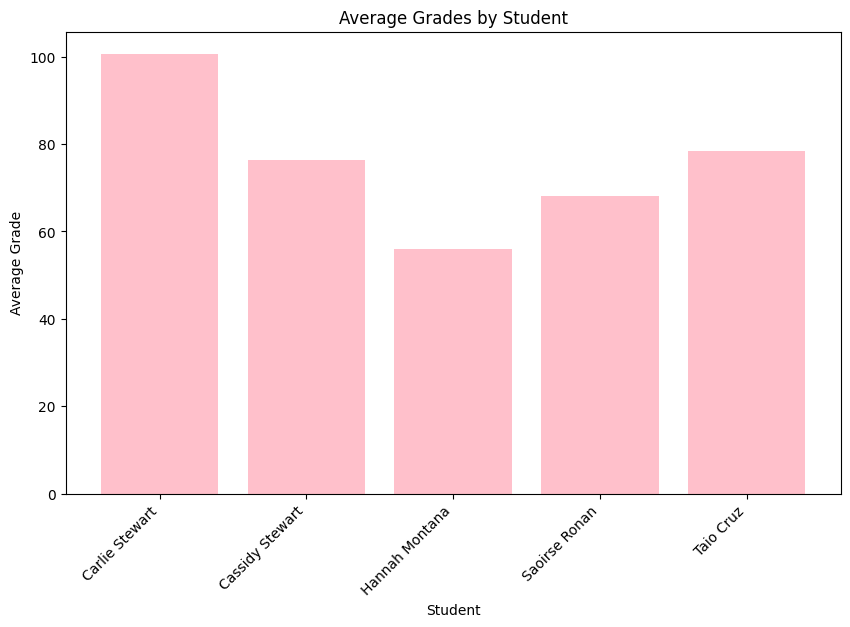

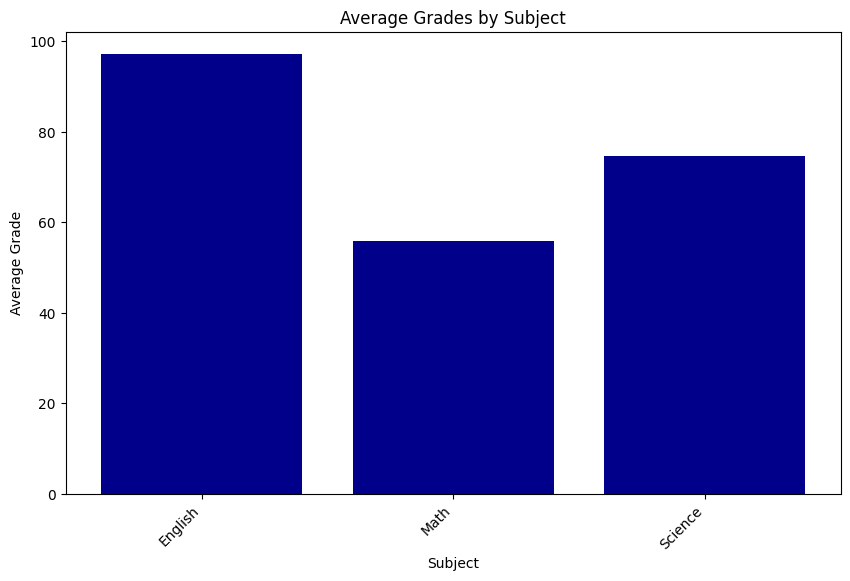

In [169]:
import matplotlib.pyplot as plt

# used this as resource for finding mean in pandas:
# https://saturncloud.io/blog/how-to-get-the-average-of-a-groupby-with-pandas/#:~:text=We%20also%20learned%20that%20to,numeric%20column%20for%20each%20group.

average_grades_by_student = joined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
average_grades_by_student = average_grades_by_student.rename(columns={'grade': 'average_grade'})

# Plot average grades for each student
plt.figure(figsize=(10,6))
plt.bar(average_grades_by_student['first_name'] + ' ' + average_grades_by_student['last_name'], average_grades_by_student['average_grade'], color='pink')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades by Student')
plt.xticks(rotation=45, ha='right')
plt.show()


average_grades_by_subject = joined_df.groupby(['subject'])['grade'].mean().reset_index()
average_grades_by_subject = average_grades_by_subject.rename(columns={'grade': 'average_grade'})

# Plot bar chart for average grade for each subject
plt.figure(figsize=(10,6))
plt.bar(average_grades_by_subject['subject'], average_grades_by_subject['average_grade'], color='darkblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades by Subject')
plt.xticks(rotation=45, ha='right')
plt.show()

Bonus Task: (5pts)

• Implement a query that finds the student with the highest grade in each subject.

• Visualize the results using a grouped bar chart.

In [178]:
# Query that finds the student with the highest grade in each subject.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM grades
JOIN students ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
  SELECT subject, MAX(grade)
  FROM grades
  GROUP BY subject
  )
''')

highest_grade_by_subject = cursor.fetchall()

# Display the result
for row in highest_grade_by_subject:
  full_name = row[0] + ' ' + row[1] + ' has the highest grade in ' + row[2]
  print(full_name)

# Define column names
columns = ['first_name', 'last_name', 'subject', 'grade']

# Create DataFrame
highest_grades_df = pd.DataFrame(highest_grade_by_subject, columns=columns)
highest_grades_df.head()


Carlie Stewart has the highest grade in Math
Carlie Stewart has the highest grade in Science
Saoirse Ronan has the highest grade in English


,first_name,last_name,subject,grade
0,Carlie,Stewart,Math,100
1,Carlie,Stewart,Science,105
2,Saoirse,Ronan,English,105


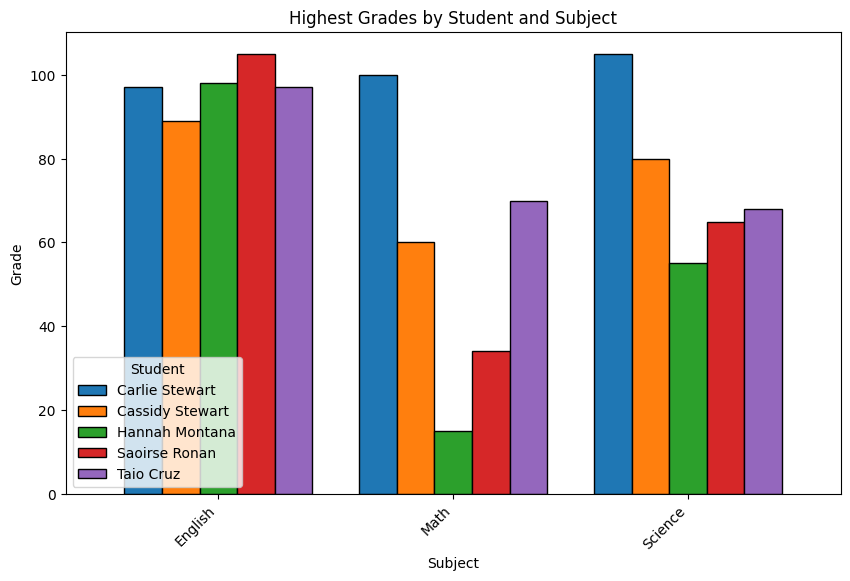

In [198]:
# Visualize the results using a grouped bar chart
# I chose to visualize it in this format because the student who received the highest grade in each subject is most evident to me.
# Also, since it is a grouped bar chart, it made sense to group by the name variable rather than the subject variable.

# https://stackoverflow.com/questions/40420240/grouped-bar-graph-pandas

import matplotlib.pyplot as plt

joined_df['student'] = joined_df['first_name'] + ' ' + joined_df['last_name']
plot_data = joined_df.pivot_table(index='subject', columns='student', values='grade', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_data.plot(kind='bar', ax=ax, width=0.8, edgecolor='black')

# Customize the plot
ax.set_xlabel('Subject')
ax.set_ylabel('Grade')
ax.set_title('Highest Grades by Student and Subject')
ax.legend(title='Student', loc='lower left')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()